# Assignment Week 2

* Answer each question completely.
* Include your code and summarize what you see in a brief narrative.

__Charting:__
Remember to make your charts as self-sufficient as possible (i.e., labels, titles, lack of clutter)  

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/car_prices/car_prices.csv', low_memory=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493484 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547043 non-null  object 
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558837 non-null  object 
 14  sellingprice  558837 non-null  int64  
 15  saledate      558837 non-null  object 
dtypes: float64(1), int64(2), object(13)
memory usage: 68.2+ MB


# Data Description:
- year: year the car was built (e.g., the model year)  
- make: the manufacturer.
- model: specific model of the car  
- trim: subtype of the car model.
- body: body style of the car.
- transmission: type of transmission  
- state: state car is registered.
- condition: numerical rating of the condition, higher is better.  
- odometer: number of miles the car has been driven.   
- color: color of the car.  
- interior: type of interior (e.g., seats).
- mmr: estimated wholesale price of the car if auctioned.  
- sellingprice: actual sales price of the car.

## Question 1. Determine the number of missing values in each column.

In [ ]:
# Initializing an empty list by storing the data into list and convert into data frame to get the desired output
missing_counts = []

# Iterate over column names and Series (columns)
for col, series in df.iteritems():
    # Count missing values
    count = series.isna().sum()
    # Append the column name and missing count to the list
    missing_counts.append((col, count))

# Create a DataFrame from the list of tuples
missing_counts_df = pd.DataFrame(missing_counts, columns=['Column', 'Missing_Count'])

print(missing_counts_df)


<ipython-input-6-f4fcbb27f171>:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col, series in df.iteritems():


          Column  Missing_Count
0           year              0
1           make          10301
2          model          10399
3           trim          10651
4           body          13195
5   transmission          65353
6            vin              4
7          state              0
8      condition          11794
9       odometer             94
10         color            749
11      interior            749
12        seller              0
13           mmr              0
14  sellingprice              0
15      saledate              0


Sample narrative description.

## Question 2. Check the data types.
- Which columns are coded to the incorrect type? If any, correct them.

In [ ]:
import pandas as pd

# Display the data types of each column before correction
print("Before correction:")
print(df.dtypes)

# Correcting data types
df['year'] = pd.to_numeric(df['year'], errors='coerce')  # Convert to numeric
df['make'] = df['make'].astype('string')  # Convert to string
df['model'] = df['model'].astype('string')  # Convert to string
df['trim'] = df['trim'].astype('string')  # Convert to string
df['body'] = df['body'].astype('string')  # Convert to string
df['transmission'] = df['transmission'].astype('string')  # Convert to string
df['state'] = df['state'].astype('string')  # Convert to string
df['condition'] = pd.to_numeric(df['condition'], errors='coerce')  # Convert to numeric
df['odometer'] = pd.to_numeric(df['odometer'], errors='coerce')  # Convert to numeric
df['color'] = df['color'].astype('string')  # Convert to string
df['interior'] = df['interior'].astype('string')  # Convert to string
df['mmr'] = pd.to_numeric(df['mmr'], errors='coerce') #
df['sellingprice'] = pd.to_numeric(df['sellingprice'], errors='coerce')  # Convert to numeric
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce', utc=True)  # Convert to datetime with UTC

# Display the data types of each column after correction
print("\nAfter correction:")
print(df.dtypes)


Before correction:
year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition        object
odometer        float64
color            object
interior         object
seller           object
mmr              object
sellingprice      int64
saledate         object
dtype: object

After correction:
year                          int64
make                         string
model                        string
trim                         string
body                         string
transmission                 string
vin                          object
state                        string
condition                   float64
odometer                    float64
color                        string
interior                     string
seller                       object
mmr                         float64
sellingprice                  int64
saledate        datetime

Sample narrative description.

## Question 3. Analyze the `make` column.
- Comment on what you observe.  
- Clean the column to reduce the number of unique values to as few as reasonably possible (no hard coding).

Hint: What do you notice if you run this:
```python
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)
```

In [ ]:
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)

['<na>',
 'acura',
 'acura',
 'airstream',
 'aston martin',
 'audi',
 'audi',
 'bentley',
 'bmw',
 'bmw',
 'buick',
 'buick',
 'cadillac',
 'cadillac',
 'chev truck',
 'chevrolet',
 'chevrolet',
 'chrysler',
 'chrysler',
 'daewoo',
 'dodge',
 'dodge',
 'dodge tk',
 'dot',
 'ferrari',
 'fiat',
 'fisker',
 'ford',
 'ford',
 'ford tk',
 'ford truck',
 'geo',
 'gmc',
 'gmc',
 'gmc truck',
 'honda',
 'honda',
 'hummer',
 'hyundai',
 'hyundai',
 'hyundai tk',
 'infiniti',
 'isuzu',
 'jaguar',
 'jeep',
 'jeep',
 'kia',
 'kia',
 'lamborghini',
 'land rover',
 'land rover',
 'landrover',
 'lexus',
 'lexus',
 'lincoln',
 'lincoln',
 'lotus',
 'maserati',
 'maserati',
 'mazda',
 'mazda',
 'mazda tk',
 'mercedes',
 'mercedes-b',
 'mercedes-benz',
 'mercury',
 'mercury',
 'mini',
 'mitsubishi',
 'mitsubishi',
 'nissan',
 'nissan',
 'oldsmobile',
 'oldsmobile',
 'plymouth',
 'plymouth',
 'pontiac',
 'pontiac',
 'porsche',
 'porsche',
 'ram',
 'rolls-royce',
 'saab',
 'saturn',
 'scion',
 'smart',
 '

From this code when i was try to execute i have observed multiple duplicate values with same name and with that same name i have observed like gmc , gmc truck and hyundai, hyundai tk and so on.

But to remove this duplicate values you can use the below code and we are using lanbda by converting them all into lower and title by making first letter as Capital and we are making it unique method with this duplicates will be removed.

In [ ]:
# Convert the 'make' column to string type and apply lowercase with title case
df['make'] = df['make'].astype(str).apply(lambda x: x.lower().title())

# Get unique values in the 'make' column and sort them
unique_makes = sorted(df['make'].unique())

# Print unique values in sorted format
for make in unique_makes:
    print(make)


<Na>
Acura
Airstream
Aston Martin
Audi
Bentley
Bmw
Buick
Cadillac
Chev Truck
Chevrolet
Chrysler
Daewoo
Dodge
Dodge Tk
Dot
Ferrari
Fiat
Fisker
Ford
Ford Tk
Ford Truck
Geo
Gmc
Gmc Truck
Honda
Hummer
Hyundai
Hyundai Tk
Infiniti
Isuzu
Jaguar
Jeep
Kia
Lamborghini
Land Rover
Landrover
Lexus
Lincoln
Lotus
Maserati
Mazda
Mazda Tk
Mercedes
Mercedes-B
Mercedes-Benz
Mercury
Mini
Mitsubishi
Nissan
Oldsmobile
Plymouth
Pontiac
Porsche
Ram
Rolls-Royce
Saab
Saturn
Scion
Smart
Subaru
Suzuki
Tesla
Toyota
Volkswagen
Volvo
Vw


Sample narrative description.

## Question 4. Analyze the relationship between the wholeprice `mmr` and the `salesprice`.
- What is the overall correlation?  
- What happens to the correlation as you increase the maximum selling price window (e.g., 0-10000, 0-20000,...)?
- Create a scatter plot with the relationship.  
- Create a graph that shows how the correlation changes.

In [ ]:
overall_corr = df['mmr'].corr(df['sellingprice'])
print(f"Overall Correlation: {overall_corr}")

Overall Correlation: 0.9836337168977266


In [ ]:
# We see the correlation generally increases as we include more high-priced cars.
prices = [10000, 20000, 30000, 40000, 50000]
corrs = []
for price in prices:
    df_sub = df[df['sellingprice'] < price]
    corr = df_sub['mmr'].corr(df_sub['sellingprice'])
    corrs.append(corr)
print("Correlation for prices are: ")
print(corrs)

Correlation for prices are: 
[0.8710246568086286, 0.9579424895393597, 0.9742329305426929, 0.9790805696128294, 0.9812259258844015]


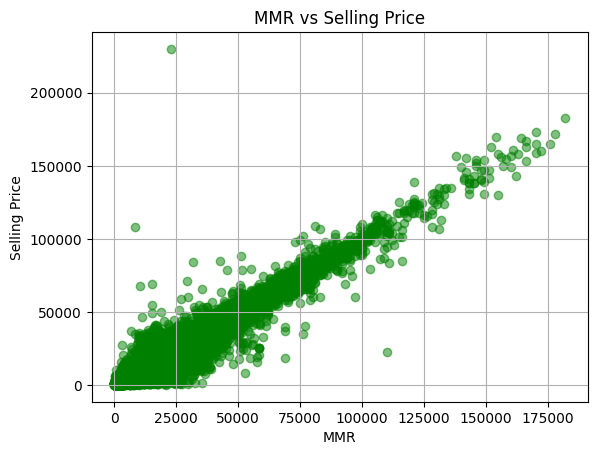

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot with colors Relationship
plt.scatter(df['mmr'], df['sellingprice'], color='green', alpha=0.5)  # Scatter plot of 'mmr' against 'sellingprice' with green color and transparency alpha=0.5
plt.xlabel('MMR')  # Label for x-axis
plt.ylabel('Selling Price')  # Label for y-axis
plt.title("MMR vs Selling Price")  # Title of the plot
plt.grid(True)  # Show grid
plt.show()


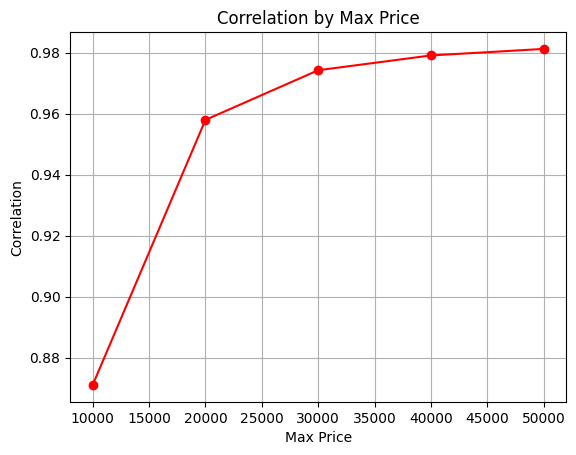

In [ ]:
import matplotlib.pyplot as plt

# Plotting the correlation by max price with colors
plt.plot(prices, corrs, marker='o', color='red')  # Plotting prices on x-axis and corresponding correlations on y-axis
plt.xlabel('Max Price')  # Label for x-axis
plt.ylabel('Correlation')  # Label for y-axis
plt.title("Correlation by Max Price")  # Title of the plot
plt.grid(True)  # Show grid
plt.show()


With this i have observed that
The correlation indicates the strength and direction of the linear relationship between these two variables. A correlation coefficient close to 1 suggests a strong positive linear relationship, close to -1 suggests a strong negative linear relationship, and close to 0 suggests no linear relationship.

By dividing the data into different selling price windows and i have observe how the correlation fluctuates.This analysis tells that the relationship between MMR and selling price varies for cars in different price ranges.

The aim of scatter plot is to visualize the relationship between MMR and selling price. Each data point represents a car, with MMR on the x-axis and selling price on the y-axis. This plot helps visualize the overall pattern of the relationship and identify any outliers or nonlinear patterns.

The correlation between MMR and selling price changes with different maximum selling price windows. This graph provides a clearer view of how the correlation fluctuates across different price ranges, helping identify any trends or patterns in the relationship.

## Question 5. How does the distribution of `salesprice` vary by make for cars made between 2010-2015?
- Use the 10 most common makes (your cleaned version of this column).  
- Create a graph that answers this question.

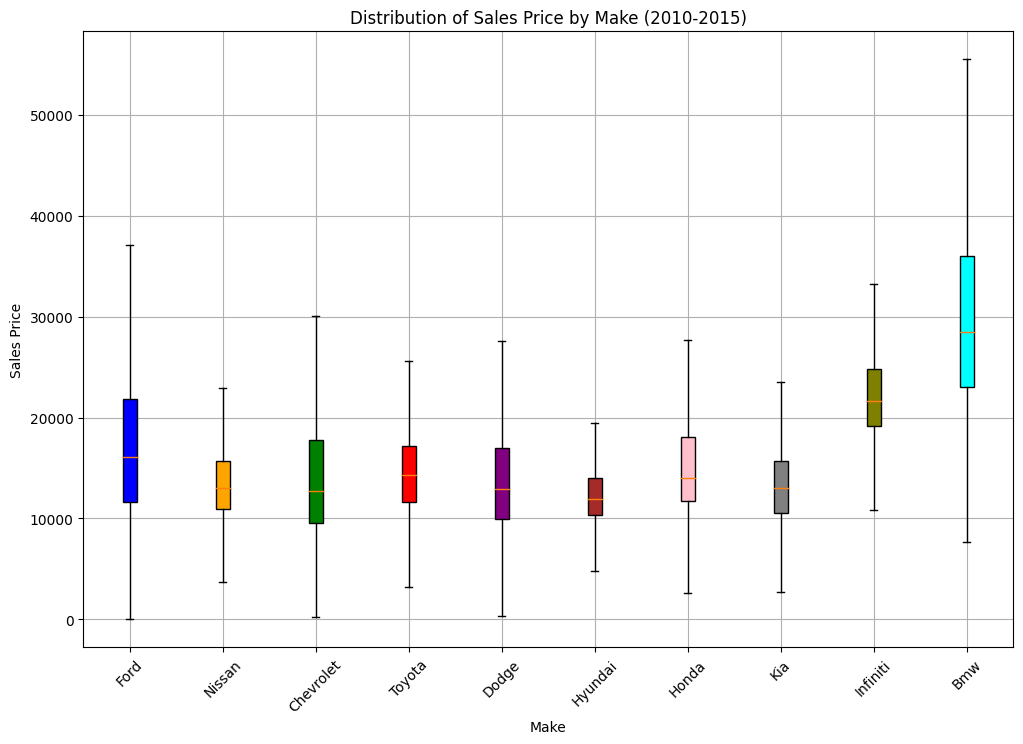

In [14]:
# Filter data for cars made between 2010 and 2015
selected_years_data = df[(df['year'] >= 2010) & (df['year'] <= 2015)]

# Get the 10 most common makes by using count and iconverting into list
top_10_makes = selected_years_data['make'].value_counts().head(10).index.tolist()

# Filter the data to include only the top 10 makes
filtered_data = selected_years_data[selected_years_data['make'].isin(top_10_makes)]

# Define colors for the boxplots
boxplot_colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Create a boxplot to visualize the distribution of sales prices by make
plt.figure(figsize=(12, 8))
plt.xticks(rotation=45)

# Iterate over each make and plot its boxplot with a different color
for i, make in enumerate(top_10_makes):
    plt.boxplot(filtered_data[filtered_data['make'] == make]['sellingprice'], positions=[i], labels=[make], showfliers=False, patch_artist=True, boxprops=dict(facecolor=boxplot_colors[i]))

plt.title('Distribution of Sales Price by Make (2010-2015)')
plt.xlabel('Make')
plt.ylabel('Sales Price')
plt.grid(True)
plt.show()



Sample narrative description.